<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [4]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd

# Specify the file path
file_path = "dataset.csv"

# Read the CSV file into a Pandas data frame
df = pd.read_csv(file_path)

# Display the data frame
print(df)

<ipython-input-4-913a3cb5eb85>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


     Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0             0         Acer         4  IPS Panel    2   1         5   
1             1         Dell         3    Full HD    1   1         3   
2             2         Dell         3    Full HD    1   1         7   
3             3         Dell         4  IPS Panel    2   1         5   
4             4           HP         4    Full HD    2   1         7   
..          ...          ...       ...        ...  ...  ..       ...   
233         233       Lenovo         4  IPS Panel    2   1         7   
234         234      Toshiba         3    Full HD    2   1         5   
235         235       Lenovo         4  IPS Panel    2   1         5   
236         236       Lenovo         3    Full HD    3   1         5   
237         237      Toshiba         3    Full HD    2   1         5   

     Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0            35.560            1.6       8             2

In [5]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: ['Screen_Size_cm', 'Weight_kg']


In [6]:
most_frequent_screen_size = df['Screen_Size_cm'].mode()[0]
df['Screen_Size_cm'].fillna(most_frequent_screen_size, inplace=True)

<ipython-input-6-9fd0186309fe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].fillna(most_frequent_screen_size, inplace=True)


In [7]:
mean_weight = df['Weight_kg'].mean()
df['Weight_kg'].fillna(mean_weight, inplace=True)

<ipython-input-7-71b3437a3074>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].fillna(mean_weight, inplace=True)


In [8]:
print(df)

     Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0             0         Acer         4  IPS Panel    2   1         5   
1             1         Dell         3    Full HD    1   1         3   
2             2         Dell         3    Full HD    1   1         7   
3             3         Dell         4  IPS Panel    2   1         5   
4             4           HP         4    Full HD    2   1         7   
..          ...          ...       ...        ...  ...  ..       ...   
233         233       Lenovo         4  IPS Panel    2   1         7   
234         234      Toshiba         3    Full HD    2   1         5   
235         235       Lenovo         4  IPS Panel    2   1         5   
236         236       Lenovo         3    Full HD    3   1         5   
237         237      Toshiba         3    Full HD    2   1         5   

     Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0            35.560            1.6       8             2

In [9]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: []


In [10]:
df['Screen_Size_cm'] = df['Screen_Size_cm'].astype(float)
df['Weight_kg'] = df['Weight_kg'].astype(float)
print(df)

     Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0             0         Acer         4  IPS Panel    2   1         5   
1             1         Dell         3    Full HD    1   1         3   
2             2         Dell         3    Full HD    1   1         7   
3             3         Dell         4  IPS Panel    2   1         5   
4             4           HP         4    Full HD    2   1         7   
..          ...          ...       ...        ...  ...  ..       ...   
233         233       Lenovo         4  IPS Panel    2   1         7   
234         234      Toshiba         3    Full HD    2   1         5   
235         235       Lenovo         4  IPS Panel    2   1         5   
236         236       Lenovo         3    Full HD    3   1         5   
237         237      Toshiba         3    Full HD    2   1         5   

     Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0            35.560            1.6       8             2

In [11]:
# Convert 'Screen_Size_cm' from centimeters to inches
df['Screen_Size_inch'] = df['Screen_Size_cm'] * 0.393701

# Rename the attribute 'Screen_Size_cm' to 'Screen_Size_inch'
df.drop('Screen_Size_cm', axis=1, inplace=True)

# Convert 'Weight_kg' from kilograms to pounds
df['Weight_pounds'] = df['Weight_kg'] * 2.20462

# Rename the attribute 'Weight_kg' to 'Weight_pounds'
df.drop('Weight_kg', axis=1, inplace=True)

# Display the updated data frame with the modified attributes
print(df)

     Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0             0         Acer         4  IPS Panel    2   1         5   
1             1         Dell         3    Full HD    1   1         3   
2             2         Dell         3    Full HD    1   1         7   
3             3         Dell         4  IPS Panel    2   1         5   
4             4           HP         4    Full HD    2   1         7   
..          ...          ...       ...        ...  ...  ..       ...   
233         233       Lenovo         4  IPS Panel    2   1         7   
234         234      Toshiba         3    Full HD    2   1         5   
235         235       Lenovo         4  IPS Panel    2   1         5   
236         236       Lenovo         3    Full HD    3   1         5   
237         237      Toshiba         3    Full HD    2   1         5   

     CPU_frequency  RAM_GB  Storage_GB_SSD  Price  Screen_Size_inch  \
0              1.6       8             256    978         14.000

In [12]:
# Normalize the 'CPU_frequency' values by dividing each value by the maximum value
max_cpu_frequency = df['CPU_frequency'].max()
df['CPU_frequency'] = df['CPU_frequency'] / max_cpu_frequency

# Display the data frame with the normalized 'CPU_frequency' values
print(df)

     Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0             0         Acer         4  IPS Panel    2   1         5   
1             1         Dell         3    Full HD    1   1         3   
2             2         Dell         3    Full HD    1   1         7   
3             3         Dell         4  IPS Panel    2   1         5   
4             4           HP         4    Full HD    2   1         7   
..          ...          ...       ...        ...  ...  ..       ...   
233         233       Lenovo         4  IPS Panel    2   1         7   
234         234      Toshiba         3    Full HD    2   1         5   
235         235       Lenovo         4  IPS Panel    2   1         5   
236         236       Lenovo         3    Full HD    3   1         5   
237         237      Toshiba         3    Full HD    2   1         5   

     CPU_frequency  RAM_GB  Storage_GB_SSD  Price  Screen_Size_inch  \
0         0.551724       8             256    978         14.000

In [13]:
# Convert 'Screen' into indicator variables and append them to the original data frame
df1 = pd.get_dummies(df['Screen'], prefix='Screen')
df = pd.concat([df, df1], axis=1)

# Drop the original 'Screen' attribute from the data frame
df.drop('Screen', axis=1, inplace=True)

# Display the updated data frame with indicator variables
print(df)

     Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  CPU_frequency  \
0             0         Acer         4    2   1         5       0.551724   
1             1         Dell         3    1   1         3       0.689655   
2             2         Dell         3    1   1         7       0.931034   
3             3         Dell         4    2   1         5       0.551724   
4             4           HP         4    2   1         7       0.620690   
..          ...          ...       ...  ...  ..       ...            ...   
233         233       Lenovo         4    2   1         7       0.896552   
234         234      Toshiba         3    2   1         5       0.827586   
235         235       Lenovo         4    2   1         5       0.896552   
236         236       Lenovo         3    3   1         5       0.862069   
237         237      Toshiba         3    2   1         5       0.793103   

     RAM_GB  Storage_GB_SSD  Price  Screen_Size_inch  Weight_pounds  \
0         8     

In [14]:
statistical_description = df.describe(include='all')

print(statistical_description)

        Unnamed: 0 Manufacturer    Category         GPU          OS  \
count   238.000000          238  238.000000  238.000000  238.000000   
unique         NaN           11         NaN         NaN         NaN   
top            NaN         Dell         NaN         NaN         NaN   
freq           NaN           71         NaN         NaN         NaN   
mean    118.500000          NaN    3.205882    2.151261    1.058824   
std      68.848868          NaN    0.776533    0.638282    0.235790   
min       0.000000          NaN    1.000000    1.000000    1.000000   
25%      59.250000          NaN    3.000000    2.000000    1.000000   
50%     118.500000          NaN    3.000000    2.000000    1.000000   
75%     177.750000          NaN    4.000000    3.000000    1.000000   
max     237.000000          NaN    5.000000    3.000000    2.000000   

          CPU_core  CPU_frequency      RAM_GB  Storage_GB_SSD        Price  \
count   238.000000     238.000000  238.000000      238.000000   238.0

In [15]:

import numpy as np
from scipy.stats import pearsonr


# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')

# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], df['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})

# Print the results
print(results_df)

                         Attribute  Correlation Value  Pearson Coefficient  \
Unnamed: 0              Unnamed: 0           0.321933             0.321933   
Category                  Category           0.286243             0.286243   
GPU                            GPU           0.288298             0.288298   
OS                              OS          -0.221730            -0.221730   
CPU_core                  CPU_core           0.459398             0.459398   
CPU_frequency        CPU_frequency           0.366666             0.366666   
RAM_GB                      RAM_GB           0.549297             0.549297   
Storage_GB_SSD      Storage_GB_SSD           0.243421             0.243421   
Screen_Size_inch  Screen_Size_inch          -0.110644            -0.110644   
Weight_pounds        Weight_pounds          -0.050312            -0.050312   

                       P-value  
Unnamed: 0        3.851058e-07  
Category          7.225696e-06  
GPU               6.166950e-06  
OS       

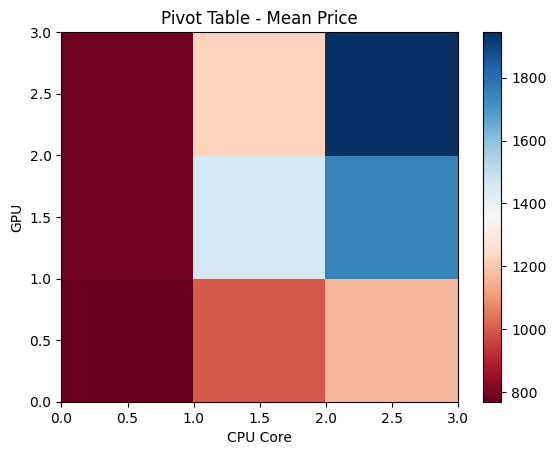

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean()

# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()

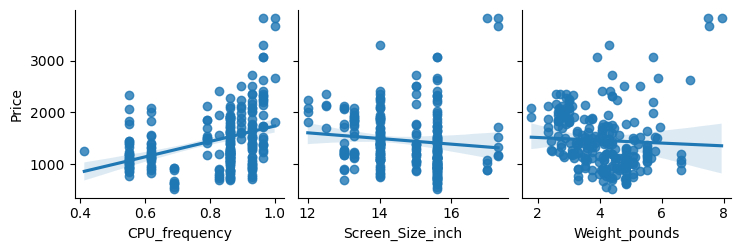

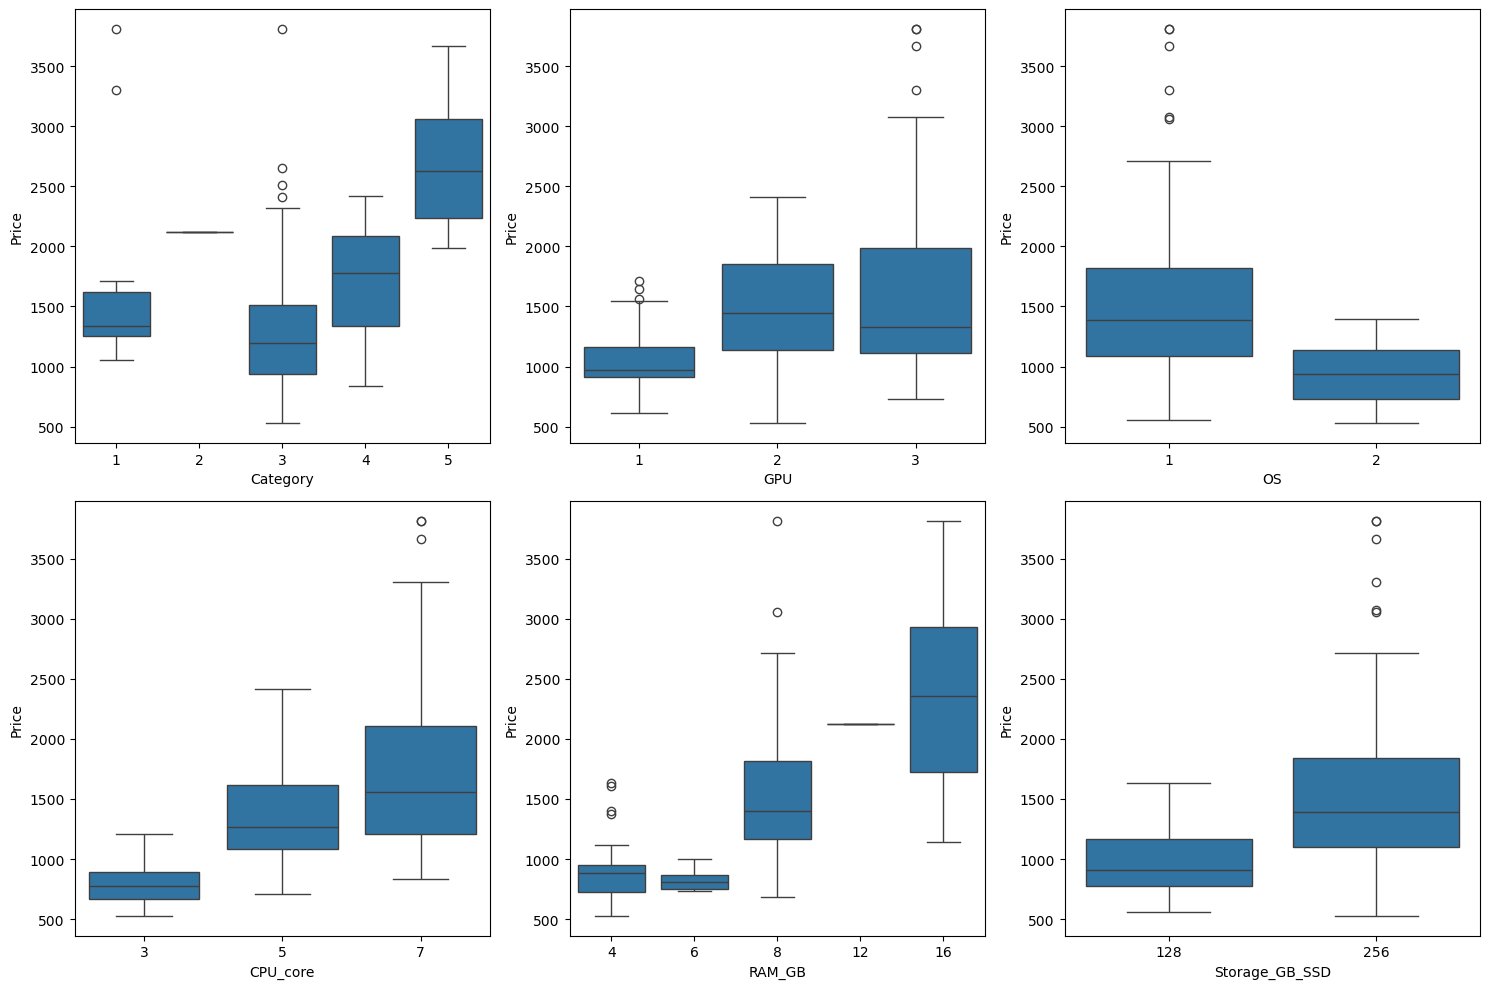

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt
data = df


# Step 1: Create regression plots
sns.pairplot(data, x_vars=['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds'], y_vars=['Price'], kind='reg')
plt.show()

# Step 2: Create box plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(x='Category', y='Price', data=data, ax=axs[0, 0])
sns.boxplot(x='GPU', y='Price', data=data, ax=axs[0, 1])
sns.boxplot(x='OS', y='Price', data=data, ax=axs[0, 2])
sns.boxplot(x='CPU_core', y='Price', data=data, ax=axs[1, 0])
sns.boxplot(x='RAM_GB', y='Price', data=data, ax=axs[1, 1])
sns.boxplot(x='Storage_GB_SSD', y='Price', data=data, ax=axs[1, 2])

plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'df' is the pandas data frame with your data

# Specify the source and target variables
source_variable = 'CPU_frequency'
target_variable = 'Price'

# Split the data into training and testing sets
X = df[[source_variable]]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 239035.99429436043
R^2 Score: -0.03719417833496497


In [20]:


# Define your source variables (X) and target variable (y)
X = data[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 168575.62043820194
R^2 Score: 0.268538394630248


In [23]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


# Define your source variable (X) and target variable (y)
X = data[['CPU_frequency']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multiple polynomial regression models with orders 2, 3, and 5
orders = [2, 3, 5]
for order in orders:
    poly_features = PolynomialFeatures(degree=order)
    X_poly = poly_features.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_poly, y_train)
    
    X_test_poly = poly_features.transform(X_test)
    y_pred = model.predict(X_test_poly)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Polynomial Regression Model (Order {order}):")
    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)
    print()

# Compare the performance of the models based on MSE and R^2 values
# Lower MSE and higher R^2 values indicate better model performance


Polynomial Regression Model (Order 2):
Mean Squared Error: 196263.5614577072
R^2 Score: 0.14839844951324477

Polynomial Regression Model (Order 3):
Mean Squared Error: 205918.03020817673
R^2 Score: 0.10650702302551396

Polynomial Regression Model (Order 5):
Mean Squared Error: 207335.7036095745
R^2 Score: 0.10035563731872632



In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define your source variables (X) and target variable (y)
X = data[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for parameter scaling, polynomial feature generation, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=3)),
    ('linear_reg', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 6.490787758466817e+30
R^2 Score: -2.8163989677635222e+25


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define your source variables (X) and target variable (y)
X = data[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial features and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Define the hyperparameters to tune
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],
    'ridge__alpha': [0.0001,0.001,0.01, 0.1, 1, 10]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions
y_pred = grid_search.predict(X_test)

# Calculate Mean Squared Error and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
